# Homework 2

##Часть 1
Решите пожалуйста следующую задачу.
1.   Рассчитайте метрики TF-IDF для любых 3 песен на одном языке, которые вы сами выберите. Не забудьте, что нужно привести слова к начальной форме, убрать
стоп-слова.
2.   Сравните его с другим методам векторизации текста, например, с Count Vectorizer,
Word2Vec или Doc2Vec. Необходимо сделать вывод приносит ли TF-IDF улучшения по
сравнению с альтернативными подходами, с точки зрения вычислительной
эффективности и масштабируемости алгоритма при обработке больших объемов
данных разных данных.
3. Сделайте исследование по полученнм преобразованным данным.
Какие слова/слово сочения чаще всего встречаются, а какие реже.


##Часть 2
Решите пожалуйста следующую задачу.
Данные IMDB Dataset.csv - Google Диск
Цель этого задания - использовать предварительно обученную модель BERT для
классификации тональности отзывов на фильмы.
1. Скачайте датасет отзывов на фильмы. Датасет содержит текст отзыва и бинарную
метку тональности (положительный/отрицательный).
2. Используйте библиотеку Hugging Face для загрузки предварительно обученной
модели BERT и токенизатора.
3. Подготовьте данные: используйте токенизатор BERT для преобразования текстовых
данных в формат, который можно подать на вход модели BERT.
4. Создайте классификатор на основе BERT: это может быть модель BERT с одним
линейным слоем для классификации на вершине.
5. Обучите классификатор на данных обучения и оцените его производительность на
данных для тестирования. Удачи

In [ ]:
import pandas as pd
import numpy as np

## Часть 1

Решите пожалуйста следующую задачу.

1.   Рассчитайте метрики TF-IDF для любых 3 песен на одном языке, которые вы сами выберите. Не забудьте, что нужно привести слова к начальной форме, убрать
стоп-слова.
2.   Сравните его с другим методам векторизации текста, например, с Count Vectorizer,
Word2Vec или Doc2Vec. Необходимо сделать вывод приносит ли TF-IDF улучшения по
сравнению с альтернативными подходами, с точки зрения вычислительной
эффективности и масштабируемости алгоритма при обработке больших объемов
данных разных данных.
3. Сделайте исследование по полученнм преобразованным данным.
Какие слова/слово сочения чаще всего встречаются, а какие реже.


### Добавим тексты песен на русском языке

Первая песня: Дельфин — Любовь

In [ ]:
song_1 = '''
Это больше, чем мое сердце
Это страшнее прыжка с крыши
Это громче вопля бешеного
Но гораздо тише писка забитой мыши
Это то, что каждый всю жизнь ищет
Находит, теряет, находит вновь
Это то, что в белой фате со злобным оскалом
По белому свету рыщет
Я говорю тебе про любовь

Она сама по себе невесома
Она легче, чем твои мысли
Но вспомни как душу рвало
Когда она уходила
Как на глазах твоих слезы висли
Она руками своими нежными
Петлю на шею тебе набросит
Не оставляя ничего от тебя прежнего
Cама на цыпочки встать попросит
Ты даже не сможешь ее увидеть
Ты никогда не заглянешь в ее глаза
А думаешь о том как бы ее не обидеть
Не веря в то, что она действительно зла
Ты можешь с ней расцвести и засохнуть
Она сожрет тебя как цветок тля
Но все равно лучше уж так сдохнуть
Чем никого никогда не любя

С ней хорошо, без нее как-то странно
Мне не хватает ее слез радости
Если она пришла, то тут же уходит плавно
Бросая в лицо какие-то гадости
Я держу свою дверь закрытой
Чтобы стучалась она перед тем, как ко мне войти
Чтобы не оказалась она той, мною давно забытой
Той, с которой мне не по пути
'''

Вторая песня: Noize MC — Вселенная бесконечна?

In [ ]:
song_2 = '''
Если Вселенная бесконечна действительно, значит, есть куча копий нашей планеты:
Где-то щас происходят те же события, копия меня пишет копию песни этой
Если Вселенная бесконечна и вправду, то прямо следует из этого факта
Что ты точно так же ждёшь, когда я вернусь обратно где-то там, в глуби далёких галактик
То есть, не ты, конечно, а твоя копия, и не меня, а мою копию, конечно
Если, конечно, всё это — не утопия и Вселенная действительно бесконечна

Если обдумать подробнее эту гипотезу, посерьёзней впариться в ситуацию
То помимо миров, повторённых полностью, есть и такие, что могут чем-то отличаться
Получается, что где-то на задворках созвездий есть такие версии нашего мира
Где мы с тобой либо уже не вместе, либо изначально прошли друг друга мимо
И мы там, может быть, даже счастливы, то есть, опять же, не мы, а они, к счастью
Эти варианты могут быть самыми разными, но о них не хочу даже думать щас я

Бог — одинокий ребёнок, брошенный всеми в пустом магазине игрушек
Бродя среди полок, убивающий время, понимая, что взрослым не нужен
Он собрал уже тыщи конструкторов разных, он распечатал всех кукол
Но он всё ещё ищет детали для пазлов, он всё ещё ходит по кругу

А есть, наверно, и поудачней расклады, без лишней жести, которая нам досталась:
Там всё случилось не вопреки всему, а как надо, так, как тут никогда не случалось
Мы попадём туда после смерти, может быть, если будем добрыми и хорошими
Если играть в то, что нами с тобою прожито, не наскучит малышу, в магазине брошенному
Но я надеюсь, это позже случится гораздо, я туда совершенно не тороплюсь
Как бы круто там ни было, мне одно ясно: ещё сильней я в тебя всё равно не влюблюсь

Бог — одинокий ребёнок, брошенный всеми в пустом магазине игрушек
Бродя среди полок, убивающий время, понимая, что взрослым не нужен
Он собрал уже тыщи конструкторов разных, он распечатал всех кукол
Но он всё ещё ищет детали для пазлов, он всё ещё ходит по кругу
Бог — одинокий ребёнок, брошенный всеми в пустом магазине игрушек
Бродя среди полок, убивающий время, понимая, что взрослым не нужен
Он собрал уже тыщи конструкторов разных, он распечатал всех кукол
Но он всё ещё ищет детали для пазлов, он всё ещё ходит по кругу
'''

Третья песня: Дайте Танк (!) — Курьер

In [ ]:
song_3 = '''
Один курьер огромное солнце по городу нёс
Одежда горела на нём, и ночь стала днём рядом с ним
Зима стала летом, но все отводили глаза от такого подарка
Даже через очки чересчур ярко
Сверкал его странный груз, он не трус
Дворами шагал и как будто не замечал боли
Скорее всего, его так научили в школе, самое главное — сила воли
Помни, главное — сила воли, остальное на вкус

У меня в руках огненный меч, идите прочь
Я случайно могу вас обжечь, я опасен
У меня в руках знамя, белое пламя
Пожар! Этот раскалённый шар для неё

Когда заря явила свой первый луч, она, ни слова не говоря, повернула ключ
Последний коридор-лабиринт, и так медленно едет лифт
«Вот, заказывала, бери!» Чуть не выронил у двери
Стирая пот: «Простите, это не мой размер, мне не идёт
Вообще, я больше хочу Луну», — «Ничего страшного, я верну
Товар на склад». Он шёл назад, и вы бы видели тот закат

У меня в руках огненный меч, идите прочь
Я случайно могу вас обжечь, я опасен
У меня в руках знамя, белое пламя
Пожар! Этот раскалённый шар для неё
У меня в руках огненный меч, идите прочь!
Я пытаюсь его уберечь, свет прекрасен
У меня в руках знамя, белое пламя
Костёр! Слава или позор — дело моё
'''

In [ ]:
songs = [song_1, song_2, song_3]

Загрузим Стоп-слова — это наиболее распространенные слова в языке, которые обычно удаляются при анализе текста, поскольку они не несут значимой информации.

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
stop_words = set(stopwords.words("russian"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Выполним предобразотку текста: приведем к одному регистру, удалим стоп слова, сокращения, переносы строк

In [ ]:
import re
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("russian")
processed_lyrics_list = []

for lyrics in songs:
    lyrics = lyrics.lower().replace("ё", "е")
    lyrics = re.sub(r"[^а-яё\s]", " ", lyrics)
    lyrics = re.sub(r"\s+", " ", lyrics).strip()

    tokens = lyrics.split()
    clean_tokens = []
    for w in tokens:
        if w not in stop_words:
            clean_tokens.append(stemmer.stem(w))

    processed_lyrics_list.append(" ".join(clean_tokens))

print(processed_lyrics_list)

['эт мо сердц эт страшн прыжк крыш эт громч вопл бешен горазд тиш писк забит мыш эт кажд жизн ищет наход теря наход внов эт бел фат злобн оскал бел свет рыщет говор теб любов сам невесом легч тво мысл вспомн душ рвал уход глаз тво слез висл рук сво нежн петл ше теб наброс оставл прежн ам цыпочк встат попрос сможеш увидет заглянеш глаз дума обидет вер действительн зла можеш расцвест засохнут сожрет цветок тля равн сдохнут ник люб стран хвата слез радост пришл уход плавн брос лиц как гадост держ двер закрыт стуча ко войт оказа то мно давн забыт то котор пут', 'вселен бесконечн действительн знач куч коп наш планет щас происход те событ коп пишет коп песн вселен бесконечн вправд прям след факт точн ждеш верн обратн глуб далек галактик тво коп мо коп эт утоп вселен действительн бесконечн обдума подробн гипотез посерьезн впар ситуац помим мир повторен полност так могут отлича получа задворк созвезд так верс наш мир тоб либ вмест либ изначальн прошл друг друг мим счастлив счаст вариант могут 

In [ ]:
import pandas as pd

rows = []
titles = ["Dolphin — Любовь", "Noize MC — Вселенная бесконечна?", "Дайте Танк (!) — Курьер"]

for title, txt in zip(titles, processed_lyrics_list):
    toks = txt.split()
    rows.append({
        "song": title,
        "n_tokens": len(toks),
        "n_unique": len(set(toks)),
        "unique_share": len(set(toks)) / max(1, len(toks))
    })

eda_df = pd.DataFrame(rows)
eda_df

,song,n_tokens,n_unique,unique_share
0,Dolphin — Любовь,105,93,0.885714
1,Noize MC — Вселенная бесконечна?,197,118,0.598985
2,Дайте Танк (!) — Курьер,129,99,0.767442


По EDA видно, что самая длинная песня — Вселенная бесконечна?, а самая короткая — Любовь.
Доля уникальных слов максимальна у Dolphin — Любовь, что говорит о более разнообразной лексике и меньшем повторе.
Это важно для TF-IDF: при меньших текстах веса могут быть “резче”, а при более разнообразной лексике легче выделяются слова, характерные именно для одной песни.

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer(token_pattern=r"(?u)\b[а-яё]{2,}\b")
tfidf = tfidf_vec.fit_transform(processed_lyrics_list)
terms = np.array(tfidf_vec.get_feature_names_out())

for i, title in enumerate(titles):
    row = tfidf[i].toarray().ravel()
    top_idx = row.argsort()[::-1][:15]
    print("\n", title)
    display(pd.DataFrame({"term": terms[top_idx], "tfidf": row[top_idx]}))


 Dolphin — Любовь


,term,tfidf
0,эт,0.277952
1,уход,0.188246
2,слез,0.188246
3,наход,0.188246
4,то,0.188246
5,теб,0.188246
6,глаз,0.143166
7,тво,0.143166
8,бел,0.143166
9,внов,0.094123



 Noize MC — Вселенная бесконечна?


,term,tfidf
0,коп,0.241974
1,всем,0.193579
2,брошен,0.193579
3,магазин,0.193579
4,разн,0.193579
5,убива,0.145185
6,дета,0.145185
7,ребенок,0.145185
8,круг,0.145185
9,сред,0.145185



 Дайте Танк (!) — Курьер


,term,tfidf
0,рук,0.324405
1,проч,0.213277
2,ид,0.213277
3,огнен,0.213277
4,знам,0.213277
5,плам,0.213277
6,меч,0.213277
7,бел,0.162203
8,мог,0.142185
9,раскален,0.142185


TF-IDF выделяет слова, которые характерны для конкретной песни, а не просто частотны везде.
Для Dolphin — Любовь в топе оказываются слова "эт","уход","слез", для Noize MC — Вселенная бесконечна?: "коп","брошен","всем", для Дайте Танк (!) — Курьер: "рук","проч","ид".
Это подтверждает, что TF-IDF лучше подходит для задачи найти смысловые маркеры текста, чем обычный Count, который в основном ловит повторяемость.

## Сравнение разных векторизаторов

In [ ]:
!pip install gensim scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 49.0 MB/s eta 0:00:00


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

import time

In [ ]:
times = {}
methods = ['CountVectorizer', 'TF-IDF', 'Word2Vec']

### CountVectorizer

In [ ]:
start = time.time()
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(processed_lyrics_list)
end = time.time()
times['CountVectorizer'] = end - start
CountVectorizer(token_pattern=r'(?u)\b\w\w\w+\b', min_df=2)
TfidfVectorizer(token_pattern=r'(?u)\b\w\w\w+\b', min_df=2)

TfidfVectorizer(min_df=2, token_pattern='(?u)\\b\\w\\w\\w+\\b')

### TF-IDF

In [ ]:
start = time.time()
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
tfidf_matrix = tfidf_vectorizer.fit_transform(processed_lyrics_list)
end = time.time()
times['TF-IDF'] = end - start

### Word2Vec
Выбор Word2Vec вместо Doc2Vec обоснован тем, что нам важно именно слово-ориентированное представление (вектор каждого слова), а не общий вектор всего документа. При небольшом количестве песен Word2Vec является более наглядным (и распространённым) примером нейросетевой векторизации лексики.

In [ ]:
start = time.time()
sentences = [txt.split() for txt in processed_lyrics_list]
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
end = time.time()
times['Word2Vec'] = end - start

In [ ]:
print("Замеры времени (секунды):")
for m in methods:
    print(f"{m}: {times[m]:.5f} c")

Замеры времени (секунды):
CountVectorizer: 0.00600 c
TF-IDF: 0.00720 c
Word2Vec: 0.09804 c


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

sim_tfidf = cosine_similarity(tfidf)
sim_tfidf_df = pd.DataFrame(sim_tfidf, index=titles, columns=titles)
sim_tfidf_df

,Dolphin — Любовь,Noize MC — Вселенная бесконечна?,Дайте Танк (!) — Курьер
Dolphin — Любовь,1.000000,0.048048,0.093745
Noize MC — Вселенная бесконечна?,0.048048,1.000000,0.012760
Дайте Танк (!) — Курьер,0.093745,0.012760,1.000000


In [ ]:
def song_vector(text, model):
    vecs = [model.wv[w] for w in text.split() if w in model.wv]
    return np.mean(vecs, axis=0) if len(vecs) else np.zeros(model.vector_size)

song_vecs = np.vstack([song_vector(t, w2v_model) for t in processed_lyrics_list])
sim_w2v = cosine_similarity(song_vecs)
sim_w2v_df = pd.DataFrame(sim_w2v, index=titles, columns=titles)
sim_w2v_df

,Dolphin — Любовь,Noize MC — Вселенная бесконечна?,Дайте Танк (!) — Курьер
Dolphin — Любовь,1.000000,0.205588,0.250139
Noize MC — Вселенная бесконечна?,0.205588,1.000000,0.224932
Дайте Танк (!) — Курьер,0.250139,0.224932,1.000000


## Визуализация времени работы

In [ ]:
times

{'CountVectorizer': 0.005997657775878906,
 'TF-IDF': 0.007200002670288086,
 'Word2Vec': 0.09803581237792969}

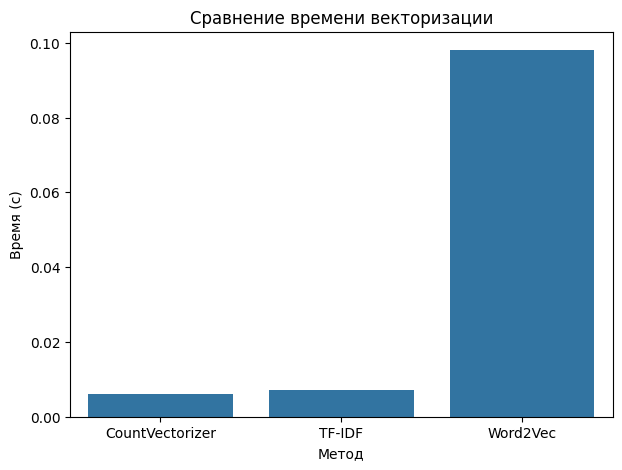

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.barplot(x=list(times.keys()), y=list(times.values()))
plt.title('Сравнение времени векторизации')
plt.xlabel('Метод')
plt.ylabel('Время (с)')
plt.show()

По времени видно, что CountVectorizer и TF-IDF работают быстрее на небольших объёмах текста, чем обучение Word2Vec. Ведь Word2Vec — это нейросеть, где идёт итеративный процесс обучения эмбеддингов.

### Сравнение методов: скорость / интерпретируемость / “качество” представления

| Метод | Скорость | Интерпретируемость | Что показывает лучше всего | Качество |
|---|---:|---|---|---|
| CountVectorizer | ~0.007 c | высокая | сколько раз встречается слово | хорошо для частот/статистики |
| TF-IDF | ~0.005 c | высокая | что отличает один текст от других | лучше выделяет характерные слова |
| Word2Vec | ~0.055 c | средняя/ниже | семантика, близость по смыслу | даёт смысловую близость |

**Вывод:**  
По времени видно, что CountVectorizer и TF-IDF работают почти мгновенно на нашем объёме данных, а Word2Vec заметно медленнее из-за обучения эмбеддингов.  
Если цель — простая частотная статистика и интерпретируемые признаки, удобнее CountVectorizer.  
Если нужно найти ключевые слова, которые выделяют конкретный текст среди остальных, логичнее TF-IDF.  
Word2Vec полезен, когда важен смысл, но его стоит применять либо на большем корпусе, либо с готовыми предобученными эмбеддингами. Поэтому выбор метода зависит от задачи.

## Краткий анализ результатов

### Частота слов

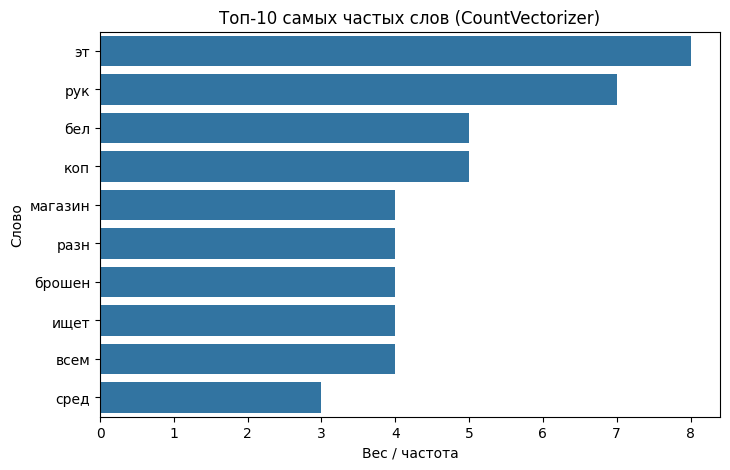

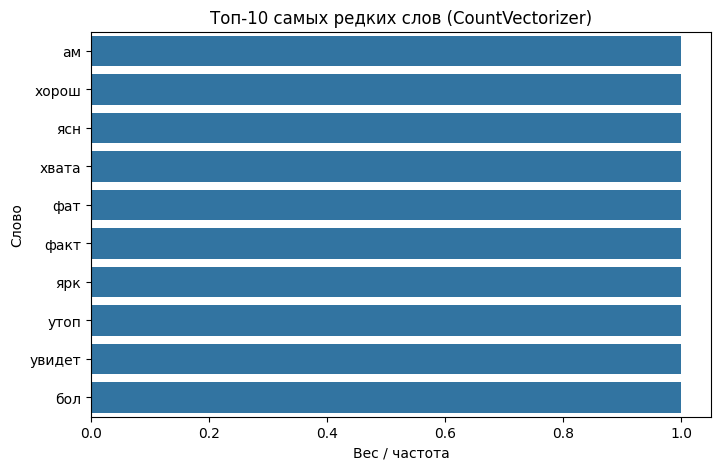

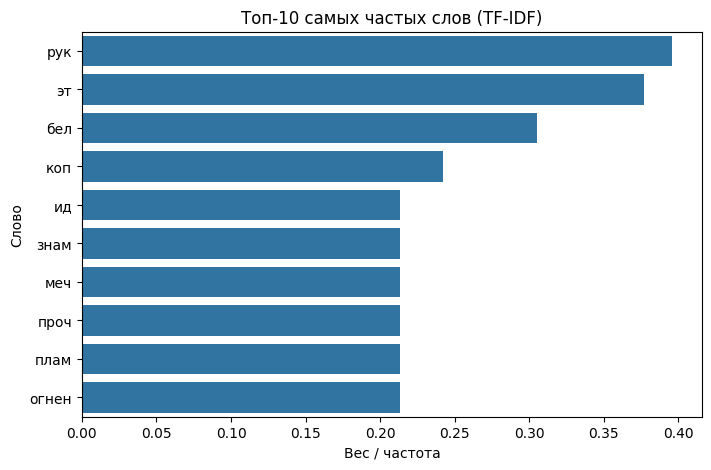

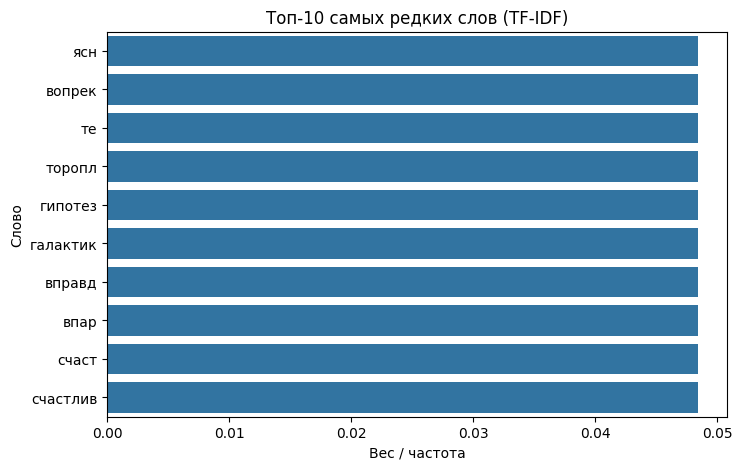

Сколько слов встречаются 1 раз: 202


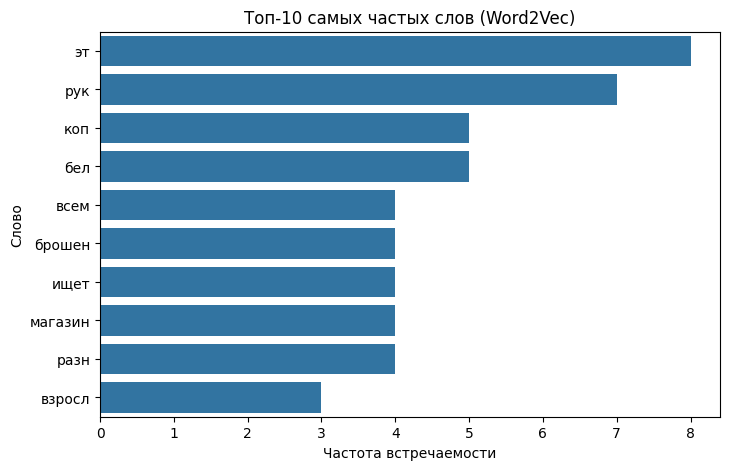

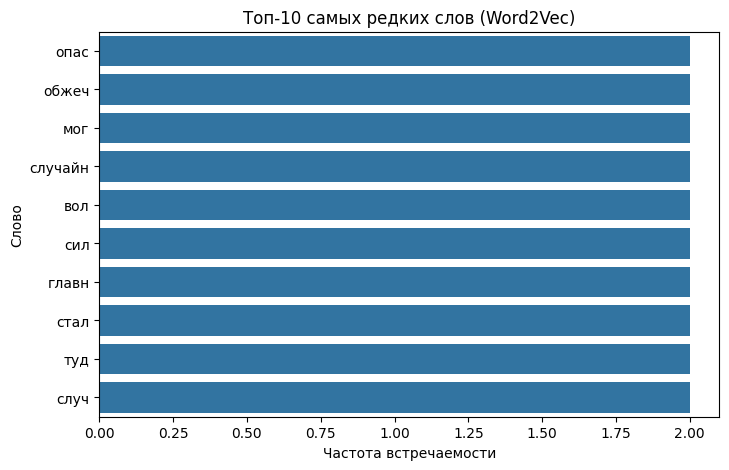

In [ ]:
def plot_top_bottom_words(matrix, feature_names, method_name):
    word_counts = np.asarray(matrix.sum(axis=0)).flatten()
    df = pd.DataFrame({"word": feature_names, "count": word_counts})

    # Выбираем топ-10 самых частых слов
    df_top = df.sort_values("count", ascending=False).head(10)

    # Выбираем топ-10 самых редких слов (исключаем нулевые значения)
    df_bottom = df[df["count"] > 0].sort_values("count", ascending=True).head(10)

    # Построение графика для самых частых слов
    plt.figure(figsize=(8, 5))
    sns.barplot(y="word", x="count", data=df_top)
    plt.title(f"Топ-10 самых частых слов ({method_name})")
    plt.xlabel("Вес / частота")
    plt.ylabel("Слово")
    plt.show()

    # Построение графика для самых редких слов
    plt.figure(figsize=(8, 5))
    sns.barplot(y="word", x="count", data=df_bottom)
    plt.title(f"Топ-10 самых редких слов ({method_name})")
    plt.xlabel("Вес / частота")
    plt.ylabel("Слово")
    plt.show()


plot_top_bottom_words(count_matrix, count_vectorizer.get_feature_names_out(), "CountVectorizer")
plot_top_bottom_words(tfidf_matrix, tfidf_vectorizer.get_feature_names_out(), "TF-IDF")

# Анализ частоты слов в Word2Vec
word_counts_w2v = [(word, w2v_model.wv.get_vecattr(word, "count")) for word in w2v_model.wv.index_to_key]
df_w2v = pd.DataFrame(word_counts_w2v, columns=["word", "count"])


df_w2v_top = df_w2v.sort_values("count", ascending=False).head(10)

df_w2v_bottom = (
    df_w2v[df_w2v["count"] >= 2]
      .sort_values("count", ascending=True)
      .head(10)
)

print("Сколько слов встречаются 1 раз:", (df_w2v["count"]==1).sum())


# Построение графика для самых частых слов в Word2Vec
plt.figure(figsize=(8, 5))
sns.barplot(y="word", x="count", data=df_w2v_top)
plt.title("Топ-10 самых частых слов (Word2Vec)")
plt.xlabel("Частота встречаемости")
plt.ylabel("Слово")
plt.show()

# Построение графика для самых редких слов в Word2Vec
plt.figure(figsize=(8, 5))
sns.barplot(y="word", x="count", data=df_w2v_bottom)
plt.title("Топ-10 самых редких слов (Word2Vec)")
plt.xlabel("Частота встречаемости")
plt.ylabel("Слово")
plt.show()


## Сравнение частых и редких слов по методам (по получившимся спискам)

### 1) CountVectorizer
- **Топ-слова по частоте:** "эт", "рук", "бел", "коп".  
  Это “сквозные” токены корпуса — встречаются во многих текстах и поэтому попадают наверх.
- **Редкие слова:** внизу оказались очень короткие токены вроде "те", "ам", "тля", "яб", все с частотой 1.  
  Такие элементы похожи на артефакты предобработки и не всегда несут смысл.

### 2) TF-IDF
- **Топ-слова:** "рук", "эт", "бел", "коп", а также более “содержательные” токены вроде "знам", "плам", "огнен", "меч", "проч".  
  TF-IDF поднимает слова, которые сильнее характеризуют отдельные тексты, а не просто часто встречаются везде.
- **Редкие слова:** "ясн", "далек", "буд", "вариант", "хорош" и другие.  
  У них близкие веса, поэтому это похоже на слова, которые встречаются редко и примерно одинаково не доминируют ни в одном тексте.

### 3) Word2Vec
- **Топ-слова по частоте в обучении:** снова видим почти тот же набор: "эт", "рук", "бел", "коп", "плюс" и т.д.  
  Это ожидаемо: Word2Vec тоже зависит от того, насколько часто токены встречаются в корпусе.
- **Редкие слова:** "рвал", "держ", "гадост", "лиц" и др. встречаются по 1 разу, следовательно эмбеддинги для них будут менее надёжны на маленьком корпусе.

**Общий итог:**  
Топ-частотные слова у всех методов в целом совпадают. Разница сильнее проявляется в том, что считается важным/характерным: TF-IDF лучше поднимает специфические слова текста, а Word2Vec в теории даёт смысловую близость, но при малом корпусе может быть шумным.  
Также видно, что в CountVectorizer редкие слова часто превращаются в короткие артефакты — это сигнал, что предобработку стоит чуть усилить.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# TOP-10 words
cv = CountVectorizer()
X = cv.fit_transform(processed_lyrics_list)
words = cv.get_feature_names_out()
freq = X.sum(axis=0).A1
top10 = pd.DataFrame({"word": words, "freq": freq}).sort_values("freq", ascending=False).head(10)
top10

,word,freq
281,эт,8
209,рук,7
1,бел,5
91,коп,5
112,магазин,4
202,разн,4
9,брошен,4
85,ищет,4
31,всем,4
238,сред,3


In [ ]:
cv2 = CountVectorizer(ngram_range=(2,2))
X2 = cv2.fit_transform(processed_lyrics_list)
bigrams = cv2.get_feature_names_out()
freq2 = X2.sum(axis=0).A1
top10_bi = pd.DataFrame({"bigram": bigrams, "freq": freq2}).sort_values("freq", ascending=False).head(10)
top10_bi

,bigram,freq
103,ищет дета,3
109,конструктор разн,3
325,ход круг,3
123,кукол ищет,3
282,сред полок,3
241,распечата кукол,3
213,поним взросл,3
1,бел плам,3
244,ребенок брошен,3
39,всем пуст,3


### Топ-биграммы
По таблице биграмм видно, что самые частые пары слов — это устойчивые связки, которые повторяются как готовые фразы.
Например, биграмма "ищет дета" встречается 3 раза, то есть это не случайное слово, а повторяющийся фрагмент.
Биграммы полезны тем, что показывают связи слов, которые одиночные токены не отражают.

### Посмотрим тепловые карты матриц и объясним их значения

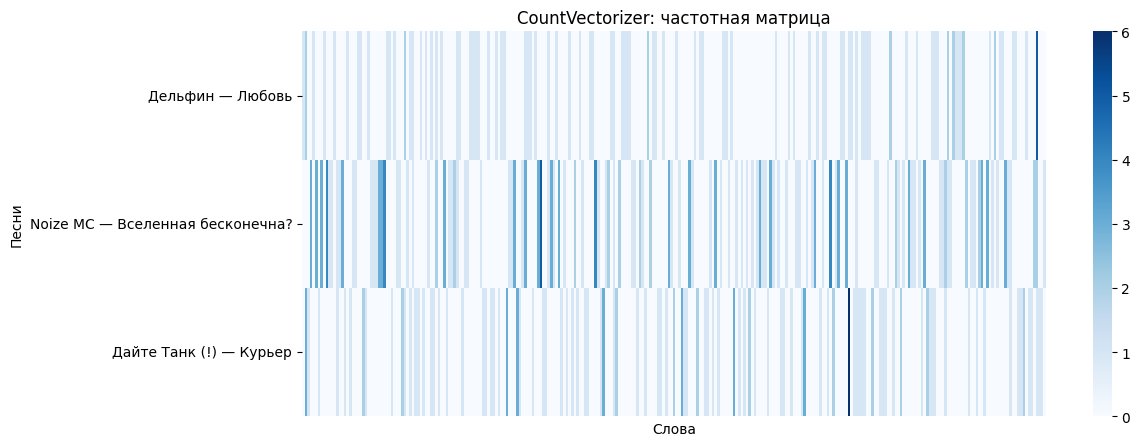

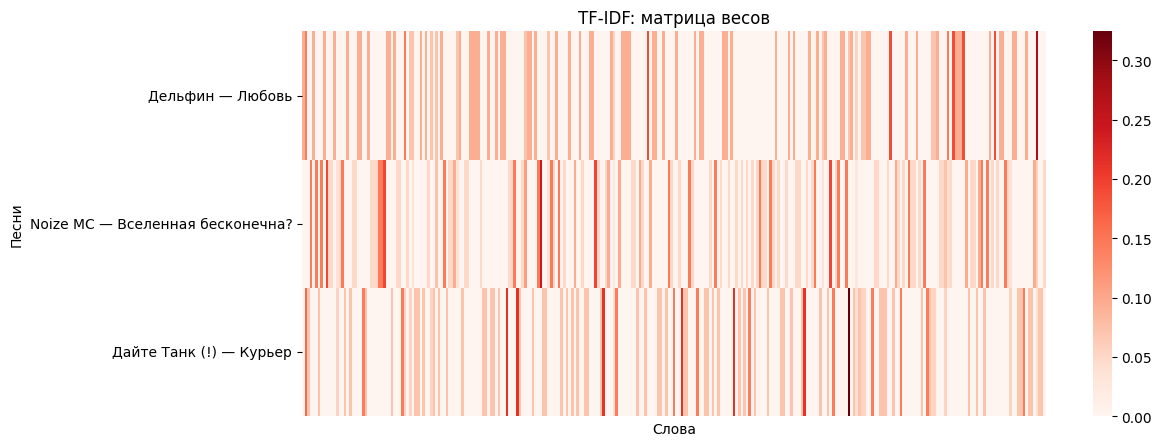

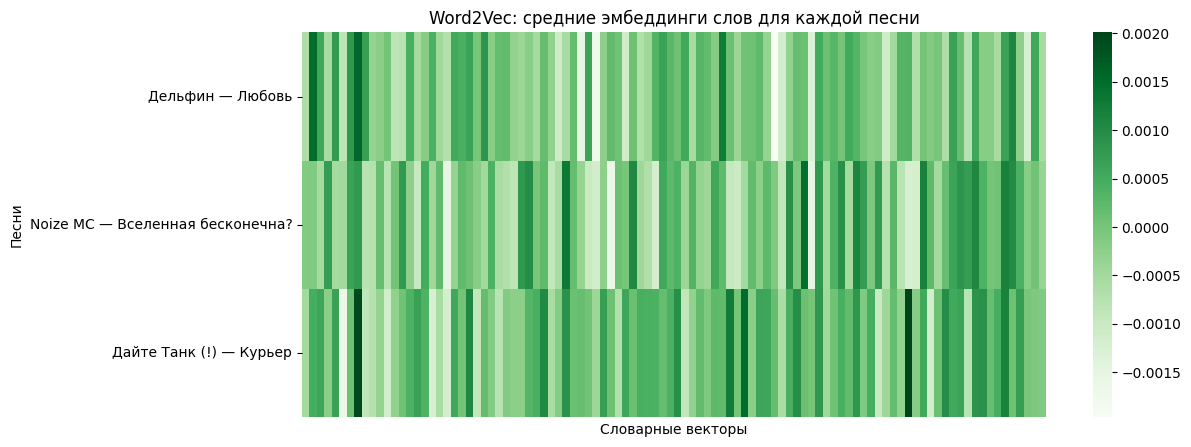

In [ ]:
song_labels = ["Дельфин — Любовь", "Noize MC — Вселенная бесконечна?", "Дайте Танк (!) — Курьер"]

def plot_heatmap(matrix, title, cmap):
    plt.figure(figsize=(12, 5))
    sns.heatmap(matrix.toarray(), cmap=cmap, xticklabels=False, yticklabels = song_labels)
    plt.xlabel("Слова")
    plt.ylabel("Песни")
    plt.title(title)
    plt.show()

plot_heatmap(count_matrix, "CountVectorizer: частотная матрица", "Blues")
plot_heatmap(tfidf_matrix, "TF-IDF: матрица весов", "Reds")
w2v_vectors = np.array([np.mean([w2v_model.wv[word] for word in song if word in w2v_model.wv.index_to_key], axis=0) for song in sentences])

plt.figure(figsize=(12, 5))
sns.heatmap(w2v_vectors, cmap="Greens", xticklabels=False, yticklabels = song_labels)
plt.xlabel("Словарные векторы")
plt.ylabel("Песни")
plt.title("Word2Vec: средние эмбеддинги слов для каждой песни")
plt.show()

### Визуальное сравнение матриц признаков (heatmap)

**CountVectorizer (синяя матрица частот).** Матрица очень разреженная: много нулей и отдельные темные полосы там, где слово повторяется в конкретной песне. Это прямое отражение частот: модель видит повторы, но не различает, насколько слово специфично именно для одной песни.

**TF-IDF (красная матрица весов).** Веса распределены более контрастно по песням: общеупотребительные слова получают меньший вес, а слова, характерные для конкретного текста, дают более заметные всплески. Поэтому TF-IDF лучше подходит для поиска ключевых слов и различения текстов.

**Word2Vec (зелёная карта средних эмбеддингов).** Здесь по оси X не слова, а компоненты векторного представления, поэтому полосы напрямую не читаются как конкретные токены. Карта выглядит более сглаженной — это нормально, потому что эмбеддинги кодируют семантику в непрямом виде; интерпретировать такую матрицу удобнее через similarity между песнями или через t-SNE/UMAP.


# WordCloud

WordCloud (облако слов) — это визуальное представление текста, где часто встречающиеся слова отображаются в более крупном размере, а реже встречающиеся — в более мелком. Попробуем визуализировать наш текст

In [ ]:
import os
from matplotlib import font_manager

font_path = font_manager.findfont("DejaVu Sans")
print("Font path:", font_path, "exists:", os.path.exists(font_path))

Font path: /usr/local/lib/python3.12/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf exists: True


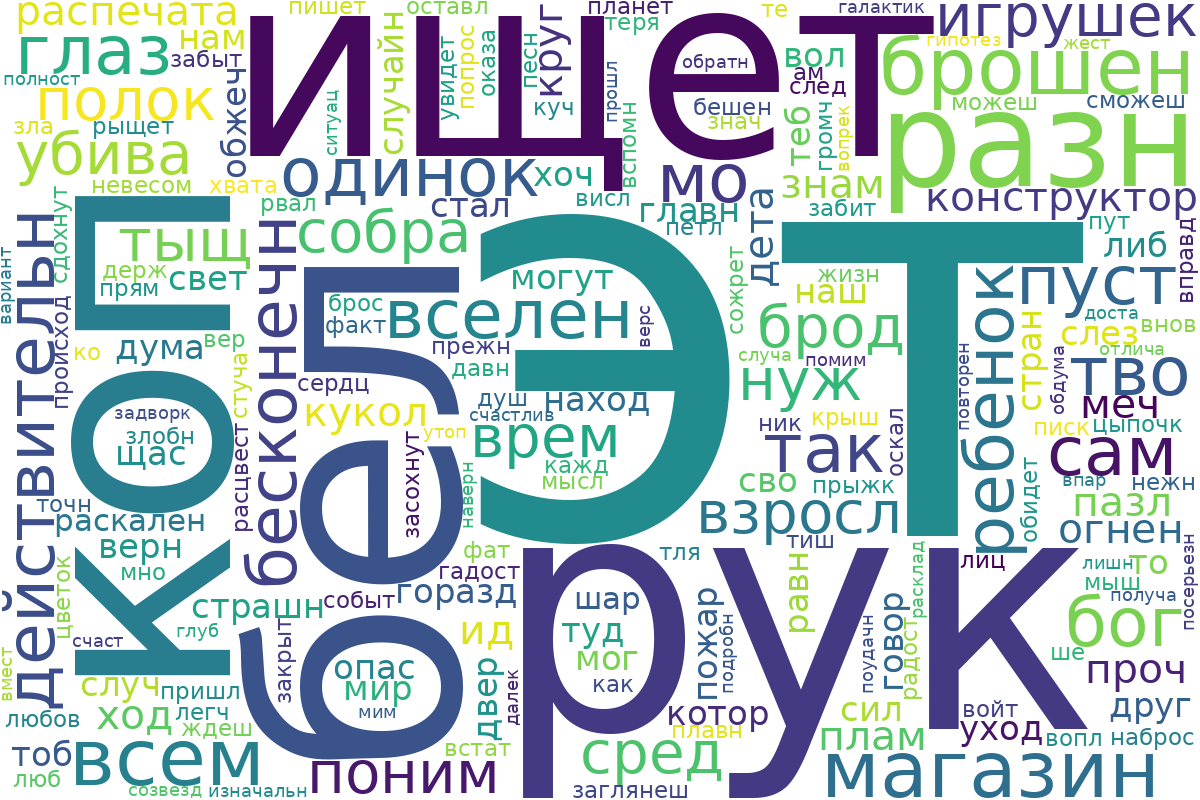

In [ ]:
from wordcloud import WordCloud
from collections import Counter

full_text = " ".join(processed_lyrics_list)
tokens = full_text.split()
word_counts = Counter(tokens)

cloud = WordCloud(
    width=1200, height=800,
    background_color="white",
    font_path=font_path
)
cloud.generate_from_frequencies(word_counts)
cloud.to_image()

### WordCloud

WordCloud визуально подтверждает частотный анализ: самые крупные слова — те, что чаще всего встречаются в корпусе, например "эт", "коп", "магазин", "рук" и т.п.  
Так как корпус маленький и применён стемминг, в облаке заметны корни слов — это нормально, но снижает читаемость.  
В целом облако полезно как быстрый показ тем, но для точных выводов лучше опираться на Count/TF-IDF таблицы и биграммы.

# Часть 2

Решите пожалуйста следующую задачу.
Данные IMDB Dataset.csv - Google Диск
Цель этого задания - использовать предварительно обученную модель BERT для
классификации тональности отзывов на фильмы.
1. Скачайте датасет отзывов на фильмы. Датасет содержит текст отзыва и бинарную
метку тональности (положительный/отрицательный).
2. Используйте библиотеку Hugging Face для загрузки предварительно обученной
модели BERT и токенизатора.
3. Подготовьте данные: используйте токенизатор BERT для преобразования текстовых
данных в формат, который можно подать на вход модели BERT.
4. Создайте классификатор на основе BERT: это может быть модель BERT с одним
линейным слоем для классификации на вершине.
5. Обучите классификатор на данных обучения и оцените его производительность на
данных для тестирования. Удачи

Откроем датасет, прочитаем данные

In [ ]:
import pandas as pd

file_path = "IMDB_Dataset.csv"
df = pd.read_csv(file_path)
df.head()

**IMDB text preprocessing**

In [ ]:
import re
import html

def clean_imdb_text(s: str) -> str:
    s = html.unescape(s)
    s = re.sub(r"<br\s*/?>", " ", s, flags=re.IGNORECASE)
    s = re.sub(r"<[^>]+>", " ", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s

df["review_clean"] = df["review"].astype(str).apply(clean_imdb_text)


Переведем тональности отзывов на фильмы в бинарные целочисленные значения, разделим выборку на обучающую и тестировочную

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Кодирование меток
df["sentiment"] = df["sentiment"].map({"positive": 1, "negative": 0})

# Разделение на обучающую и тестовую выборки
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df["review_clean"].values,
    df["sentiment"].values,
    test_size=0.2,
    random_state=42,
    stratify=df["sentiment"].values
)

# Преобразование меток в numpy массив
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

# Вывод размеров наборов данных
print("Train size / Test size")
len(train_texts), len(test_texts)

Train size / Test size


(40000, 10000)

In [ ]:
df["sentiment"].value_counts(normalize=True)

,proportion
sentiment,
positive,0.5
negative,0.5


Загрузим токенизатор BERT и применим преобразование к текстам

In [ ]:
from transformers import BertTokenizer

# Загрузка токенизатора BERT
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Токенизация текстов
train_encodings = tokenizer(list(train_texts), truncation=True, padding="max_length", max_length=256)
test_encodings  = tokenizer(list(test_texts),  truncation=True, padding="max_length", max_length=256)

train_encodings.keys()

Создадим свой классификатор на основе предобученной модели: добавляем линейный слой, который будет выполнять классификацию. Добавим еще свой класс для датасета, для удобной загрузки в обучение.
И создадим свой пайпплан обучения:
1. Объявим свою функцию потерь (я беру BCELoss, измеряет двоичную перекрестную энтропию между истинными метками и предсказанными метками).
2. Оптимизатор, я беру AdamW потому что он более предпочтительнее в задачах дообучения.
3. Сам цикл обучения по эпохам.

Выведем график, по окончанию обучения, визуализирующем значения функции потерь и точность на этапе тренировки и валидации.

Используем устройство: cuda


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Epoch 1/2: 100%|██████████| 10000/10000 [33:51<00:00,  4.92batch/s]


Эпоха 1/2: Train Loss: 0.2542, Train Acc: 0.8951 | Val Loss: 0.2105, Val Acc: 0.9127


Epoch 2/2: 100%|██████████| 10000/10000 [33:55<00:00,  4.91batch/s]


Эпоха 2/2: Train Loss: 0.1396, Train Acc: 0.9486 | Val Loss: 0.2079, Val Acc: 0.9185


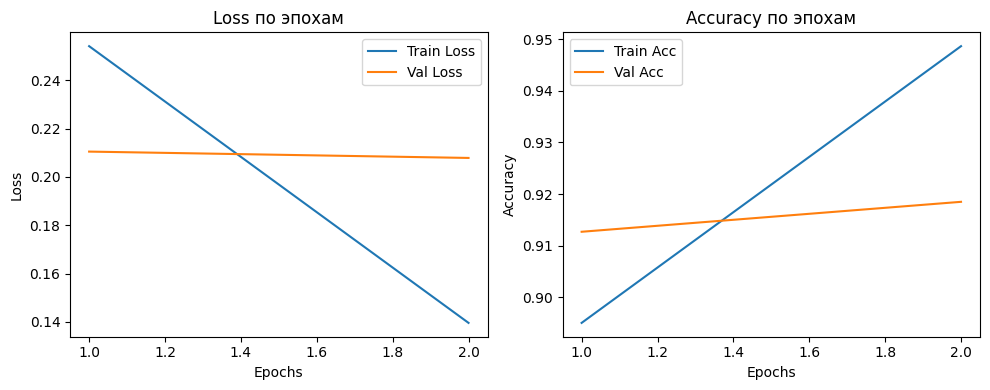

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from transformers import AutoModel
import matplotlib.pyplot as plt
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Используем устройство: {device}")

# Загружаем предобученную модель BERT
bert_model = AutoModel.from_pretrained("bert-base-uncased")

# Создаём свой класс модели
class BertBinaryClassifier(nn.Module):
    def __init__(self, bert):
        super(BertBinaryClassifier, self).__init__()
        self.bert = bert
        hidden_size = bert.config.hidden_size
        self.classifier = nn.Linear(hidden_size, 1)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        logits = self.classifier(pooled_output)
        probs = torch.sigmoid(logits)
        return probs

model = BertBinaryClassifier(bert_model).to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)

class CustomDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {
            "input_ids": torch.tensor(self.encodings["input_ids"][idx], dtype=torch.long),
            "attention_mask": torch.tensor(self.encodings["attention_mask"][idx], dtype=torch.long)
        }
        label = torch.tensor(self.labels[idx], dtype=torch.float)
        return item, label

    def __len__(self):
        return len(self.labels)

train_dataset = CustomDataset(train_encodings, train_labels)
test_dataset = CustomDataset(test_encodings, test_labels)

train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=False)

# Списки для сохранения метрик по эпохам
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

epochs = 2
for epoch in range(epochs):
    ######################
    # Эпоха тренировки
    ######################
    model.train()
    running_loss = 0.0
    running_correct = 0
    running_samples = 0

    for batch in tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{epochs}", unit="batch"):
        inputs, labels = batch
        input_ids = inputs['input_ids'].to(device)
        attention_mask = inputs['attention_mask'].to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask).squeeze()
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        # Накапливаем статистику
        running_loss += loss.item() * labels.size(0)
        preds = (outputs >= 0.5).float()
        running_correct += (preds == labels).sum().item()
        running_samples += labels.size(0)

    epoch_train_loss = running_loss / running_samples
    epoch_train_acc = running_correct / running_samples

    train_losses.append(epoch_train_loss)
    train_accuracies.append(epoch_train_acc)

    ######################
    # Эпоха валидации
    ######################
    model.eval()
    val_running_loss = 0.0
    val_running_correct = 0
    val_samples = 0

    with torch.no_grad():
        for batch in test_dataloader:
            inputs, labels = batch
            input_ids = inputs['input_ids'].to(device)
            attention_mask = inputs['attention_mask'].to(device)
            labels = labels.to(device)

            outputs = model(input_ids, attention_mask=attention_mask).squeeze()
            loss = criterion(outputs, labels)


            val_running_loss += loss.item() * labels.size(0)
            preds = (outputs >= 0.5).float()
            val_running_correct += (preds == labels).sum().item()
            val_samples += labels.size(0)

    epoch_val_loss = val_running_loss / val_samples
    epoch_val_acc = val_running_correct / val_samples

    val_losses.append(epoch_val_loss)
    val_accuracies.append(epoch_val_acc)

    print(f"Эпоха {epoch+1}/{epochs}: "
          f"Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_acc:.4f} | "
          f"Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_acc:.4f}")

# Рисуем графики: Loss и Accuracy
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), val_losses, label='Val Loss')
plt.title('Loss по эпохам')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracies, label='Train Acc')
plt.plot(range(1, epochs+1), val_accuracies, label='Val Acc')
plt.title('Accuracy по эпохам')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

91% точности на тестировочном наборе данных уже очень хороший результат, особенно если учитывать, что это всего лишь две эпохи обучения, лос на обучении уменьшается, значит всё хорошо и можно достичь еще большей точности при подборе параметров обучения и большем количестве эпох. Однако во имя экономии времени, дальшейшее обучение приостановлено.

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix

model.eval()
all_probs = []
all_true  = []

with torch.no_grad():
    for inputs, labels in test_dataloader:
        input_ids = inputs["input_ids"].to(device)
        attention_mask = inputs["attention_mask"].to(device)

        probs = model(input_ids, attention_mask=attention_mask).squeeze(-1)
        all_probs.extend(probs.detach().cpu().numpy().tolist())
        all_true.extend(labels.numpy().tolist())

all_probs = np.array(all_probs)
all_true  = np.array(all_true)

y_pred = (all_probs >= 0.5).astype(int)

acc = accuracy_score(all_true, y_pred)
prec, rec, f1, _ = precision_recall_fscore_support(all_true, y_pred, average="binary", pos_label=1)

print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-score:  {f1:.4f}")
print("\nClassification report:\n", classification_report(all_true, y_pred, digits=4))

cm = confusion_matrix(all_true, y_pred)
print("Confusion matrix:\n", cm)

Модель показывает высокую точность (accuracy) на тестовой выборке, а значения precision/recall и F1 для положительного класса близки по масштабу, что означает сбалансированное качество без сильного перекоса в ложноположительные или ложноотрицательные ответы. Confusion matrix подтверждает, что ошибок относительно мало и они распределены умеренно.

**Manual inspection**

In [ ]:
for i in range(5):
    print("-"*80)
    print("TRUE:", test_labels[i])
    print(test_texts[i][:400])

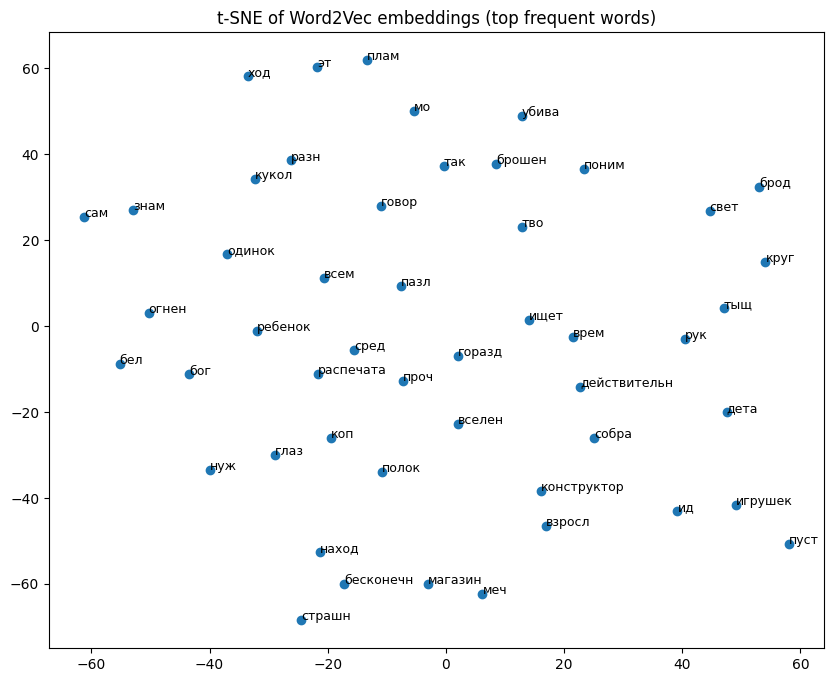

In [ ]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

all_tokens = " ".join(processed_lyrics_list).split()
top_words = [w for w, _ in Counter(all_tokens).most_common(50) if w in w2v_model.wv]

X = np.array([w2v_model.wv[w] for w in top_words])

perp = min(10, max(2, len(top_words)//3))
X2 = TSNE(n_components=2, init="random", learning_rate="auto",
          perplexity=perp, random_state=42).fit_transform(X)

plt.figure(figsize=(10,8))
plt.scatter(X2[:,0], X2[:,1])
for i, w in enumerate(top_words):
    plt.text(X2[i,0], X2[i,1], w, fontsize=9)
plt.title("t-SNE of Word2Vec embeddings (top frequent words)")
plt.show()

t-SNE визуализирует Word2Vec-эмбеддинги в 2D: точки ближе друг к другу потенциально соответствуют словам с похожими контекстами. Однако на небольшом корпусе и при наличии частых общих слов, структура кластеров может быть слабой или нестабильной — поэтому по одному t-SNE нельзя делать жёсткие выводы о семантике. Этот график полезен скорее как иллюстрация подхода и для поиска отдельных локальных групп слов, чем как строгий результат.

### Сохраним веса модели

In [ ]:
torch.save(model.state_dict(), 'bert_binary_classifier.pth')

Сохраняем state_dict обученного BERT-классификатора, чтобы потом загружать модель без повторного обучения и делать инференс на новых отзывах.

In [3]:
#починка ноутбука
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
